In [1]:
import numpy as np
from scipy.special import erf
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as patches

%matplotlib nbagg

Using matplotlibrc file from 
https://github.com/mpmdean/matplotlibrc
All fields are using latex by default -- this avoid non-uniformity when using latex in some labels. 

In [2]:
import sys
print("Python version is {} \n".format(sys.version))
print("Matplotlib version is {} \n".format(mpl.__version__))
print("Matplotlibrc file is {}\n".format(mpl.matplotlib_fname()))

Python version is 3.6.1 |Continuum Analytics, Inc.| (default, Mar 22 2017, 19:25:17) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)] 

Matplotlib version is 2.0.0 

Matplotlibrc file is /Users/markdean/.matplotlib/matplotlibrc



## Use matlotlib colors

In [3]:
colors = [c['color'] for c in mpl.rcParams['axes.prop_cycle']]

## Make fake data

In [4]:
T = np.arange(10, 65+1, 5)
Tc = 55
r = 0.7*np.sqrt( (Tc-T)/Tc )
r[np.isnan(r)] = 0
r += 0.05*np.random.rand(T.size)

r_error = 0.03 + 0.01*np.random.rand(T.size)

fwhm = 0.04*erf( (T-Tc)/10 ) + 0.002*np.random.rand(T.size)

fwhm_error = 0.005 + 0.001*np.random.rand(T.size)


/Users/markdean/anaconda/envs/main/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


## Create figure

<IPython.core.display.Javascript object>


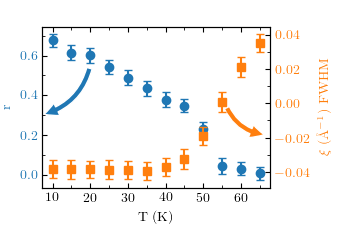

In [5]:
fig, axl = plt.subplots(figsize=(3+3/8, 2.3))

axl.errorbar(T, r, r_error, fmt='o', color=colors[0])

axr = axl.twinx()
axr.errorbar(T, fwhm, fwhm_error, fmt='s', color=colors[1])

axl.set_xlabel('T (K)')
axl.set_ylabel('r', color=colors[0])
axr.set_ylabel(r'$\xi$ (\AA{}$^{-1}$) FWHM', color=colors[1])

for ax, color in zip([axl, axr], colors):
    for t in ax.get_yticklabels():
        t.set_color(color)

fig.subplots_adjust(right=0.8, bottom=0.18)
axl.xaxis.set_major_locator(ticker.MultipleLocator(10))
axl.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
axl.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
axr.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))


arrow_l = patches.FancyArrowPatch(
        (20, 0.55),
        (7, 0.3),
        connectionstyle='arc3, rad=-0.3',
        mutation_scale=20, 
    facecolor=colors[0],
    edgecolor='w', 
    )

arrow_r = patches.FancyArrowPatch(
        (56, 0.35),
        (67, 0.2),
        connectionstyle='arc3, rad=0.3',
        mutation_scale=20, 
    facecolor=colors[1],
    edgecolor='w', 
    )

[axl.add_patch(arr) for arr in [arrow_l, arrow_r]]
fig.savefig('ex_6_two_axes.pdf', dpi=600)